In [1]:

import glob 
import pandas as pd
import numpy as np
import mne 

path = r'data_oct9' # use your path
eegfiles = glob.glob(path + "/*.csv")
stimulusfiles = glob.glob(path + "/*.txt")

eegdict = {}
stimulusdict = {}

for filename in eegfiles:
    s = filename
    start = s.find("/data_") + len("/data_")
    end = s.rfind(".csv")
    extracted = s[start:end] 
    stimuluspath = path + "/stimulus " + extracted + ".txt"
    df = pd.read_csv(filename)
    stimulusrow = []
    with open (stimuluspath, "r") as myfile:
        stimulus = myfile.read().splitlines()
        for line in stimulus:
            values = line.strip().split(',')  
            stimulusrow.append([float(val) for val in values])
    stimulusarray = np.array(stimulusrow)
    dataarray = df.to_numpy()
    eegdict[extracted] = dataarray
    stimulusdict[extracted] = stimulusarray

In [2]:
df_names = ['multiple_imagery', 'multiple_sao','multiple_movefingers', 'multiple_eye','single4thtry']

In [3]:
#get all multiple processing data 

rawdict = {}
epochdict = {}

def make_event_array(stimulus_timestamps, eeg_timestamps, labels):
    indices = []
    for st in stimulus_timestamps:
        # Find differences only for EEG timestamps that are before the stimulus timestamp
        valid_eeg_timestamps = eeg_timestamps[eeg_timestamps <= st]
        
        # Compute the differences
        diffs = st - valid_eeg_timestamps
        
        # Find the index of the smallest difference
        index = np.argmin(diffs)
        
        # Get the actual index in the original eeg_timestamps array
        actual_index = np.where(eeg_timestamps == valid_eeg_timestamps[index])[0][0]
        indices.append(actual_index)
        
    indices=np.array(indices)

    event_arr = np.array([indices.astype(int), np.zeros(len(indices)).astype(int), labels.astype(int)]).T
    return event_arr

for name in df_names:
    stimulus_timestamps = stimulusdict[name][:,0]
    eeg_timestamps = eegdict[name][:,0]
    labels = stimulusdict[name][:,1]

#code to make event array
    event_arr = make_event_array(stimulus_timestamps, eeg_timestamps, labels)

# get raw into mne format, filter and apply reference 
    data = eegdict[name]

    timearray = data[:,0]
    dataarray = data[:,1:9]

    channel_names = ['C3', 'C4','Pz', 'Fp1', 'P3', 'P4', 'A2', 'Cz']

    info = mne.create_info(ch_names=channel_names, sfreq=250.0, ch_types='eeg')
    raw = mne.io.RawArray(dataarray.T, info)
    
    raw.set_channel_types({'A2': 'eog'})
    montage =  mne.channels.make_standard_montage('standard_1020')
    raw.set_montage(montage)
    raw.set_eeg_reference(ref_channels=['A2'])
    #raw.drop_channels(['A2'])
    raw.notch_filter([60, 120], method='fir', fir_design='firwin')
    raw.filter(l_freq=0.5, h_freq=50, method='fir', fir_design='firwin')
    #raw.notch_filter(60)
    

    epochs = mne.Epochs(raw, events=event_arr, event_id=None, tmin=0, tmax=1, baseline=None, preload=True,proj=False)

    rawdict[name] = raw
    epochdict[name] = epochs
    


Creating RawArray with float64 data, n_channels=8, n_times=95881
    Range : 0 ... 95880 =      0.000 ...   383.520 secs
Ready.
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1651 samples (6.604 s)



/var/folders/36/kdqqc2hj0vj0qz_r5mtckf700000gn/T/ipykernel_89728/3490024717.py:48: RuntimeWarning: Not setting position of 1 eog channel found in montage:
['A2']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw.set_montage(montage)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 1651 samples (6.604 s)

Not setting metadata
260 matching events found
No baseline correction applied
Using data from preloaded Raw for 260 events and 251 original time points ...
0 bad epochs dropped
Creating RawArray with float64 data, n_channels=8, n_times=95819
    Range : 0 ... 95818 =      0.000 ...   383.272 secs
Ready.
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setti

/var/folders/36/kdqqc2hj0vj0qz_r5mtckf700000gn/T/ipykernel_89728/3490024717.py:48: RuntimeWarning: Not setting position of 1 eog channel found in montage:
['A2']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw.set_montage(montage)
/var/folders/36/kdqqc2hj0vj0qz_r5mtckf700000gn/T/ipykernel_89728/3490024717.py:48: RuntimeWarning: Not setting position of 1 eog channel found in montage:
['A2']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw.set_montage(montage)
/var/folders/36/kdqqc2hj0vj0qz_r5mtckf700000gn/T/ipykernel_89728/3490024717.py:48: RuntimeWarning: Not setting position of 1 eog channel found in montage:
['A2']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types b

Not setting metadata
260 matching events found
No baseline correction applied
Using data from preloaded Raw for 260 events and 251 original time points ...
0 bad epochs dropped
Creating RawArray with float64 data, n_channels=8, n_times=174895
    Range : 0 ... 174894 =      0.000 ...   699.576 secs
Ready.
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1651 samples (6.604 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter

/var/folders/36/kdqqc2hj0vj0qz_r5mtckf700000gn/T/ipykernel_89728/3490024717.py:48: RuntimeWarning: Not setting position of 1 eog channel found in montage:
['A2']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw.set_montage(montage)


Fitting ICA to data using 7 channels (please be patient, this may take a while)


Selecting by number: 6 components
Fitting ICA took 1.1s.


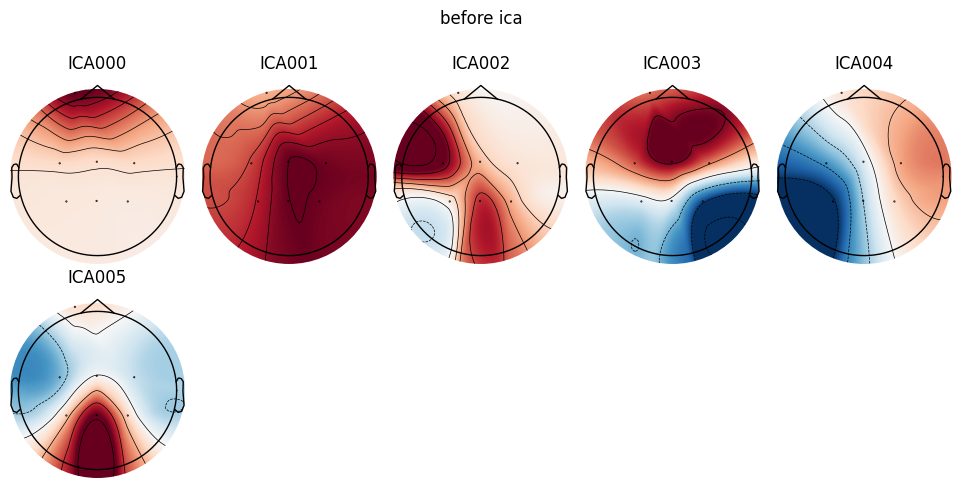

NameError: name 'cleaneddict' is not defined

In [34]:
#later compare this with the raw eeg after ica 

raw_combined = mne.concatenate_raws([rawdict['multiple_imagery'],rawdict['multiple_sao']])
raw_combined = mne.concatenate_raws([raw_combined,rawdict['multiple_movefingers']])
#raw_combined = mne.concatenate_raws([raw_combined,rawdict['multiple_eye']])
ica_motorall = mne.preprocessing.ICA(n_components=6, random_state=97)
ica_motorall.fit(raw_combined)
ica_motorall.plot_components(title="before ica")

raw_combined = mne.concatenate_raws([cleaneddict['multiple_imagery'],cleaneddict['multiple_sao']])
#raw_combined = mne.concatenate_raws([raw_combined,cleaneddict['multiple_movefingers']])
ica_motorall = mne.preprocessing.ICA(n_components=6, random_state=97)
ica_motorall.fit(raw_combined)
ica_motorall.plot_components(title='After ICA')

In [ ]:
import mne.preprocessing as mnepp
icawithfp1dict={}
for name in df_names:
   ica_eyes = mnepp.ICA(6,random_state=97)
   ica_eyes.fit(rawdict[name])
   eog_inds, scores = ica_eyes.find_bads_eog(rawdict[name], ch_name='Fp1',threshold=0.8)
   ica_eyes.plot_scores(scores, exclude=eog_inds)

   ica_eyes.plot_properties(rawdict[name])
    # ica_eyes.plot_components()
   icawithfp1dict[name] = ica_eyes.apply(rawdict[name].copy(), exclude=eog_inds)



In [36]:
#make new epochs dict with cleaned data with notch filter and iir 
notchepochs = {}
for name in icawithfp1dict.keys():
    stimulus_timestamps = stimulusdict[name][:,0]
    eeg_timestamps = eegdict[name][:,0]
    labels = stimulusdict[name][:,1]
    event_arr = make_event_array(stimulus_timestamps, eeg_timestamps, labels)
    notchepochs[name] = mne.Epochs(icawithfp1dict[name], events=event_arr, event_id=None, tmin=-0.3, tmax=1.3, baseline=None, preload=True,proj=False)

Not setting metadata
260 matching events found
No baseline correction applied
Using data from preloaded Raw for 260 events and 401 original time points ...


0 bad epochs dropped
Not setting metadata
260 matching events found
No baseline correction applied
Using data from preloaded Raw for 260 events and 401 original time points ...
0 bad epochs dropped
Not setting metadata
260 matching events found
No baseline correction applied
Using data from preloaded Raw for 260 events and 401 original time points ...
0 bad epochs dropped
Not setting metadata
260 matching events found
No baseline correction applied
Using data from preloaded Raw for 260 events and 401 original time points ...
0 bad epochs dropped
Not setting metadata
400 matching events found
No baseline correction applied
Using data from preloaded Raw for 400 events and 401 original time points ...
0 bad epochs dropped


In [256]:
icawithfp1dict["multiple_imagery"].get_data().shape

(8, 95881)

In [50]:
name="multiple_imagery"
stimulus_timestamps = stimulusdict[name][:,0]
eeg_timestamps = eegdict[name][:,0]
labels = stimulusdict[name][:,1]
event_arr = make_event_array(stimulus_timestamps, eeg_timestamps, labels)

In [51]:
#1 is neutral, 
event_arr[:, -1] += 1 

event_arr[event_arr[:, -1] == 401, -1] = 1

event_arr


array([[  892,     0,     5],
       [ 1166,     0,     9],
       [ 1438,     0,     1],
       [ 1707,     0,     1],
       [ 1984,     0,    10],
       [ 2262,     0,     7],
       [ 2537,     0,     8],
       [ 2806,     0,     6],
       [ 3075,     0,     1],
       [ 3358,     0,     3],
       [ 3632,     0,     4],
       [ 3902,     0,     2],
       [ 4165,     0,   101],
       [ 5686,     0,     3],
       [ 5958,     0,     1],
       [ 6220,     0,     8],
       [ 6486,     0,     2],
       [ 6755,     0,     5],
       [ 7025,     0,    10],
       [ 7292,     0,     1],
       [ 7566,     0,     9],
       [ 7833,     0,     7],
       [ 8098,     0,     1],
       [ 8360,     0,     4],
       [ 8624,     0,     6],
       [ 8891,     0,   101],
       [10417,     0,     1],
       [10683,     0,     1],
       [10953,     0,     4],
       [11220,     0,    10],
       [11489,     0,     7],
       [11760,     0,     6],
       [12032,     0,     5],
       [12

In [52]:
len(event_arr)

260

In [53]:
#how i went from event array to edge list

import pandas as pd
#make csv
# Create DataFrame from the array
df = pd.DataFrame(event_arr, columns=['timestamps', 'source', 'target'])

# Adjusting the 'source' to be the 'target' from the previous row, starting from the second row
for i in range(1, len(df)):  # start from 1, not 0, to avoid the first row
    df.loc[i, 'source'] = df.loc[i - 1, 'target']

# Renaming columns for your subsequent processing
df.columns = ["ts", "u", "i"]
#df['ts'] = eeg_timestamps[df['ts']]

# Initialize empty lists to store edge labels and edge indices
edge_labels = []
edge_indices = []

# Iterate through the DataFrame
for index, row in df.iterrows():
    u = row['u']
    i = row['i']
    
    # Skip rows where both u and i are zero, as they don't represent edges
    
    edge_labels.append(f'u{u}_i{i}')
    edge_indices.append(index)

# Create a new DataFrame for edge labels and indices
edges_df = pd.DataFrame({'label': edge_labels, 'idx': edge_indices})

# Horizontal Concatenation (Side by Side)
new_df = pd.concat([df, edges_df], axis=1)

In [54]:

# Channels to exclude
exclude_channels = ['Fp1', 'A2']
# Find the indices of the channels to exclude
exclude_indices = [channel_names.index(channel) for channel in exclude_channels if channel in channel_names]
print(exclude_indices)

[3, 6]


In [498]:
eeg_data = icawithfp1dict['multiple_imagery'].get_data()
eeg_data = np.delete(eeg_data, exclude_indices, axis=0)


In [499]:
eeg_data.shape

(6, 95881)

In [346]:
# Assuming you have variables 'sampling_rate' and 'n_fft'
frequency_resolution = 250 / 128

# Calculate the indices of the 8-16 Hz frequency bins
low_freq_bin = int(8 / frequency_resolution)  # Or use math.floor to be more precise
high_freq_bin = int(16 / frequency_resolution)  # Or use math.ceil to be more precise
print(low_freq_bin, high_freq_bin)

4 8


In [506]:
#now tf morlet using ts as position of event in eeg timestamps
from mne.time_frequency import tfr_morlet
eegs=[]
for i in range(len(new_df)):
    print(i)
    
    start_idx = new_df.iloc[i]['ts']
    print(start_idx)

    # Select the slice of EEG data between these timestamps
    eeg_slice = eeg_data[:, start_idx:start_idx+250]
    
    fft_res = mne.time_frequency.stft(eeg_slice, 128)
   
    selected_band = fft_res[:, low_freq_bin:high_freq_bin + 1, :]
    power = np.abs(selected_band)
    power =power.reshape(-1, 4)
    
    eegs.append(power.T)


0
892
Number of frequencies: 65
Number of time steps: 4
1
1166
Number of frequencies: 65
Number of time steps: 4
2
1438
Number of frequencies: 65
Number of time steps: 4
3
1707
Number of frequencies: 65
Number of time steps: 4
4
1984
Number of frequencies: 65
Number of time steps: 4
5
2262
Number of frequencies: 65
Number of time steps: 4
6
2537
Number of frequencies: 65
Number of time steps: 4
7
2806
Number of frequencies: 65
Number of time steps: 4
8
3075
Number of frequencies: 65
Number of time steps: 4
9
3358
Number of frequencies: 65
Number of time steps: 4
10
3632
Number of frequencies: 65
Number of time steps: 4
11
3902
Number of frequencies: 65
Number of time steps: 4
12
4165
Number of frequencies: 65
Number of time steps: 4
13
5686
Number of frequencies: 65
Number of time steps: 4
14
5958
Number of frequencies: 65
Number of time steps: 4
15
6220
Number of frequencies: 65
Number of time steps: 4
16
6486
Number of frequencies: 65
Number of time steps: 4
17
6755
Number of frequen

In [510]:
combined_array.shape

(260, 4, 30)

In [513]:
combined_array = np.array(eegs)
eegs_array = combined_array.reshape(-1, combined_array.shape[-1])
np.save(os.getcwd()+'/gnnbackup/processed/ml_wet.npy', eegs_array)

In [55]:

new_df['ts']=eeg_timestamps[df['ts']]


In [56]:
new_df['u'][0]=1

/var/folders/36/kdqqc2hj0vj0qz_r5mtckf700000gn/T/ipykernel_89728/2656804696.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['u'][0]=1


In [57]:
new_df

,ts,u,i,label,idx
0,1369865.830,1,5,u0_i5,0
1,1369866.925,5,9,u5_i9,1
2,1369868.010,9,1,u9_i1,2
3,1369869.085,1,1,u1_i1,3
4,1369870.192,1,10,u1_i10,4
...,...,...,...,...,...
255,1370235.219,1,8,u1_i8,255
256,1370236.281,8,10,u8_i10,256
257,1370237.340,10,9,u10_i9,257
258,1370238.403,9,7,u9_i7,258


In [58]:
#adding self-loops

import pandas as pd

# Assuming 'df' is your original DataFrame
df=new_df

# Create a list to hold the new rows
all_rows = []

# Define the increment for the timestamp and index
time_increment = 0.25  # for example
index_increment = 1  # Adjust if your 'idx' increment is different

# Process each row in the original DataFrame
for index, row in df.iterrows():
    if index == len(df) - 1:
        break
    print(row)
    current_ts = row['ts']
    next_ts = df.iloc[index + 1]['ts'] if index < len(df) - 1 else None
    interval = (next_ts - current_ts) /4 
    print(interval)
    # Add the current row to the new all_rows list
    all_rows.append(row.to_dict())

    # Create new self-loop rows and add them to the list
    for i in range(1, 4):  # Assuming you want to add 3 new rows
        new_ts = current_ts + i * interval  # Adjust based on how you want to increment 'ts'
        new_idx = current_idx + i   # Adjust based on how you want to increment 'idx'
        
        # Construct the new row
        new_row = {
            'ts': new_ts,
            'u': row['i'],  # For self-loop, 'u' remains the same
            'i': row['i'],  # For self-loop, 'i' is the same as 'u'
            'label': f"u{row['i']}_i{row['i']}",  # Label for self-loop
            'idx': new_idx
        }
        
        # Add the new row to the all_rows list
        all_rows.append(new_row)

# Create a new DataFrame from the all_rows list
new_df = pd.DataFrame(all_rows)

# If you want to reset the 'idx' to be continuous integers, you can do so
new_df.reset_index(drop=True, inplace=True)

# Now, 'new_df' contains your original rows plus the new self-loop rows


ts      1369865.830
u                 1
i                 5
label         u0_i5
idx               0
Name: 0, dtype: object
0.2737629999755882
ts      1369866.925
u                 5
i                 9
label         u5_i9
idx               1
Name: 1, dtype: object
0.2712685000151396
ts      1369868.010
u                 9
i                 1
label         u9_i1
idx               2
Name: 2, dtype: object
0.2687807499896735
ts      1369869.085
u                 1
i                 1
label         u1_i1
idx               3
Name: 3, dtype: object
0.27678775001550093
ts      1369870.192
u                 1
i                10
label        u1_i10
idx               4
Name: 4, dtype: object
0.2775580000015907
ts      1369871.302
u                10
i                 7
label        u10_i7
idx               5
Name: 5, dtype: object
0.27451899996958673
ts      1369872.400
u                 7
i                 8
label         u7_i8
idx               6
Name: 6, dtype: object
0.26902525004697964
ts 

In [62]:
import os
new_df['idx']=new_df.index.tolist()
new_df

,ts,u,i,label,idx
0,1369865.830,1,5,u0_i5,0
1,1369866.103,5,5,u5_i5,1
2,1369866.377,5,5,u5_i5,2
3,1369866.651,5,5,u5_i5,3
4,1369866.925,5,9,u5_i9,4
...,...,...,...,...,...
1031,1370238.137,9,9,u9_i9,1031
1032,1370238.403,9,7,u9_i7,1032
1033,1370238.666,7,7,u7_i7,1033
1034,1370238.930,7,7,u7_i7,1034


In [60]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
new_df['ts'].tolist()

[1369865.829565,
 1369866.103328,
 1369866.3770909999,
 1369866.650854,
 1369866.924617,
 1369867.1958855,
 1369867.467154,
 1369867.7384225,
 1369868.009691,
 1369868.27847175,
 1369868.5472525,
 1369868.81603325,
 1369869.084814,
 1369869.36160175,
 1369869.6383894999,
 1369869.91517725,
 1369870.191965,
 1369870.469523,
 1369870.747081,
 1369871.024639,
 1369871.302197,
 1369871.576716,
 1369871.851235,
 1369872.125754,
 1369872.400273,
 1369872.66929825,
 1369872.9383235,
 1369873.20734875,
 1369873.476374,
 1369873.74437025,
 1369874.0123665,
 1369874.28036275,
 1369874.548359,
 1369874.831182,
 1369875.1140049999,
 1369875.396828,
 1369875.679651,
 1369875.9531745,
 1369876.226698,
 1369876.5002215,
 1369876.773745,
 1369877.04347425,
 1369877.3132035001,
 1369877.58293275,
 1369877.852662,
 1369878.1154257501,
 1369878.3781895,
 1369878.64095325,
 1369878.903717,
 1369880.422685,
 1369881.9416530002,
 1369883.460621,
 1369884.979589,
 1369885.2510275,
 1369885.5224660002,
 13698

In [61]:
new_df.to_csv(os.getcwd()+'/gnnbackup/processed/ml_wet.csv', index=False)

In [ ]:
#now tf morlet using ts as position of event in eeg timestamps
from mne.time_frequency import tfr_morlet
eegs=[]
for i in range(len(new_df)):
    print(i)
    
    start_idx = new_df.iloc[i]['ts']
    print(start_idx)

    # Select the slice of EEG data between these timestamps
    eeg_slice = eeg_data[:, start_idx:start_idx+250]
    
    fft_res = mne.time_frequency.stft(eeg_slice, 128)
   
    selected_band = fft_res[:, low_freq_bin:high_freq_bin + 1, :]
    power = np.abs(selected_band)
    power =power.reshape(-1, 4)
    
    eegs.append(power.T)

In [ ]:
#node features are fft of the erp for each hand 
erpsfft =[]
for eve in notchepochs['single4thtry'].event_id:
    print(eve)
    nodefeature = notchepochs['single4thtry'][eve].crop(tmin=0, tmax=1).get_data()
    nodefeature = np.delete(nodefeature, exclude_indices, axis=1)
    eeg_slice = np.mean(nodefeature, axis=0)
    print(average_data.shape)
    fft_res = mne.time_frequency.stft(eeg_slice, 128)
    selected_band = fft_res[:, low_freq_bin:high_freq_bin + 1, :]
    power = np.abs(selected_band)
    power =power.reshape(-1, 4)
    erpsfft.append(power.T)


In [538]:
import numpy as np

# Assuming you have a numpy array 'arr' with shape (11, 4, 30)
# Create a sample array for demonstration
arr = np.random.rand(11, 4, 30)

# To move the last item to the first position in the first dimension:
reordered = np.concatenate((arr[-1, np.newaxis, ...], arr[:-1, ...]), axis=0)

print(reordered.shape)  # This should still be (11, 4, 30)

# Now, 'reordered' is your modified array where the previously last item in the first dimension is now the first.


(11, 4, 30)


In [551]:
nodearr = np.array(erpsfft)
reordered = np.concatenate((nodearr[-1, np.newaxis, ...], nodearr[:-1, ...]), axis=0)
reordered = np.average(reordered, axis=1)
print(reordered.shape)  # This should still be (11, 4, 30)
np.save(os.getcwd()+'/gnnbackup/processed/ml_wet_node.npy', reordered)

(11, 30)


In [ ]:
import pickle
with open('cleandict.pkl', 'rb') as f:
    cleaneddict = pickle.load(f)

In [ ]:
import matplotlib.pyplot as plt
plt.switch_backend('TkAgg')  # or 'inline' for Jupyter

mne.sys_info()

In [38]:
import matplotlib.pyplot as plt
import mne

def plot_ERP_comparison(epochs_dict, keys, channel_names, event_ids):
    """
    Plots a comparison of ERPs from specified epochs, channels, and events.

    Parameters:
    - epochs_dict: dictionary containing epochs data.
    - keys: list of keys to specify which epochs to use from the epochs_dict.
    - channel_names: list of channel names to plot.
    - event_ids: list of event ids to plot from each Epoch.

    This function will plot the average data for the specified channels and events.
    """
    # Create subplots
    fig, ax = plt.subplots(figsize=(10, 6))

    # Check if channel_names and event_ids are lists, if not convert them
    if not isinstance(channel_names, list):
        channel_names = [channel_names]
    if not isinstance(event_ids, list):
        event_ids = [event_ids]

    # Loop through the specified keys (i.e., conditions)
    for key in keys:
        if key in epochs_dict:
            epochs = epochs_dict[key]

            # Loop through the specified events
            for event_id in event_ids:
                # Check if the event exists in the epochs
                if event_id in epochs.event_id:
                    # Get the average data for the specified channels
                    evoked = epochs[event_id].average(picks=channel_names)

                    # Plot the data
                    for channel_name in channel_names:
                        # Extracting data for the specific channel
                        channel_idx = evoked.ch_names.index(channel_name)
                        channel_data = evoked.data[channel_idx]

                        # Plotting
                        ax.plot(evoked.times, channel_data * 1e6, label=f"{key} - {event_id} - {channel_name}")  # Convert to microvolts

    # Enhance the plot
    ax.axhline(0, linestyle='--', color='black', linewidth=0.5)  # Add a horizontal line at zero
    ax.axvline(0, linestyle='--', color='black', linewidth=0.5)  # Add a vertical line at zero (stimulus onset)
    ax.set_title('Comparison of Event-Related Potentials (ERPs)', fontsize=14)
    ax.set_xlabel('Time (s)', fontsize=12)
    ax.set_ylabel('Amplitude (µV)', fontsize=12)
    ax.legend(loc='upper right', frameon=False)  # No frame around the legend
    ax.tick_params(axis='both', which='major', labelsize=12)  # Increase tick font size

    # Set limits and labels for better readability
    _, xmax = ax.get_xlim()
    ymin, ymax = ax.get_ylim()
    ax.set_xlim([-0.1, xmax])  # Adjust as needed based on your epoch settings
    ax.set_ylim([1.5*ymin, 1.5*ymax])  # Slightly increase y-range for visual clarity

    plt.grid(True)  # Add a grid for easier visual estimation of values
    plt.tight_layout()  # Ensure spacing prevents clipping of labels
    plt.show()

# Usage example



NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


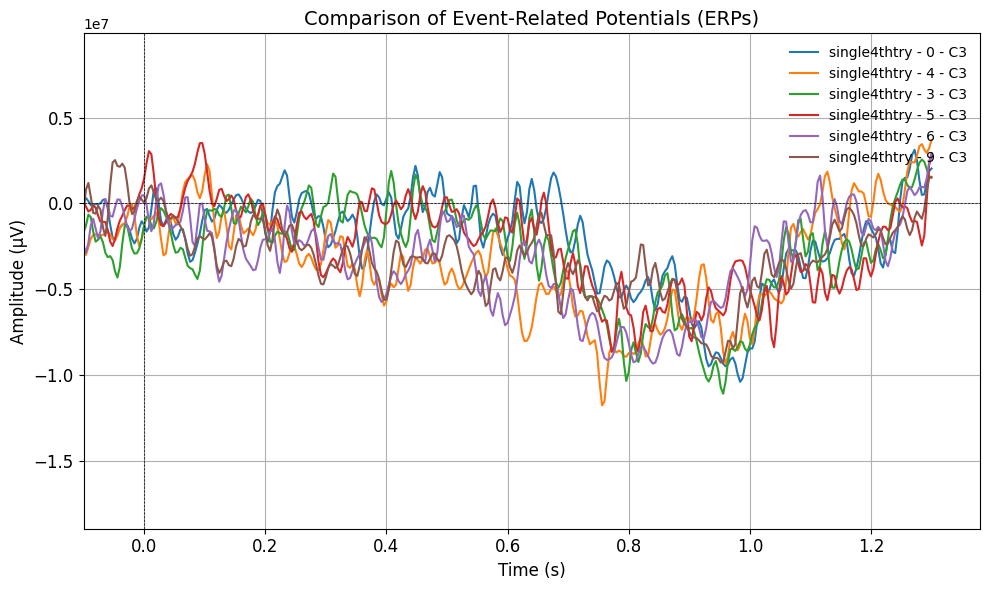

In [544]:
plot_ERP_comparison(
    epochs_dict=notchepochs,  # Your epochs dictionary
    keys=['single4thtry'],  # The specific keys you're interested in
    channel_names=['C3'],  # The channels you want to plot
    event_ids=["0","4","3","5","6","9"]  # The event IDs you want to plot
)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


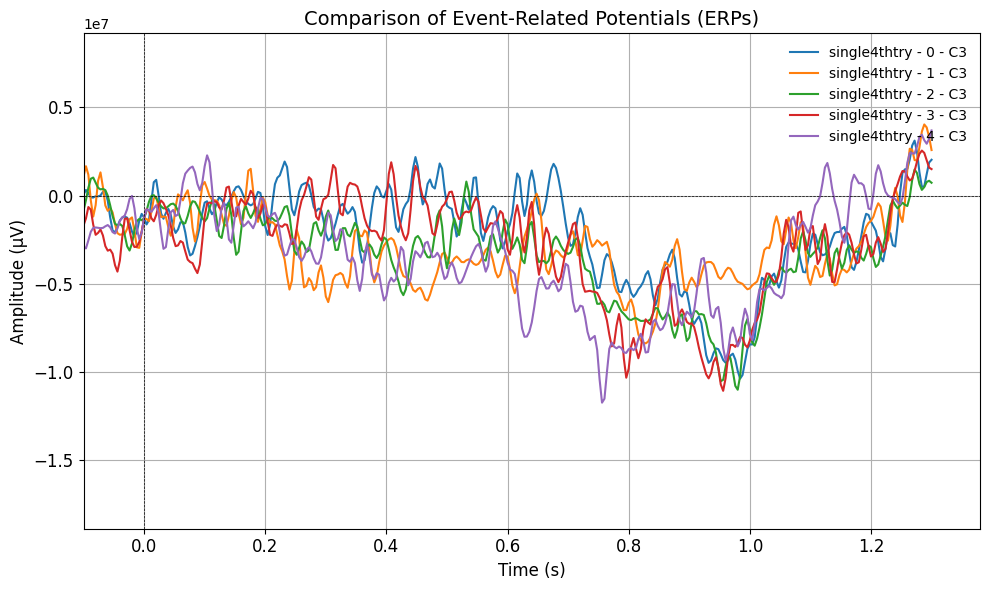

In [40]:
plot_ERP_comparison(
    epochs_dict=notchepochs,  # Your epochs dictionary
    keys=['single4thtry'],  # The specific keys you're interested in
    channel_names=['C3'],  # The channels you want to plot
    event_ids=["0","1","2","3","4"]  # The event IDs you want to plot
)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


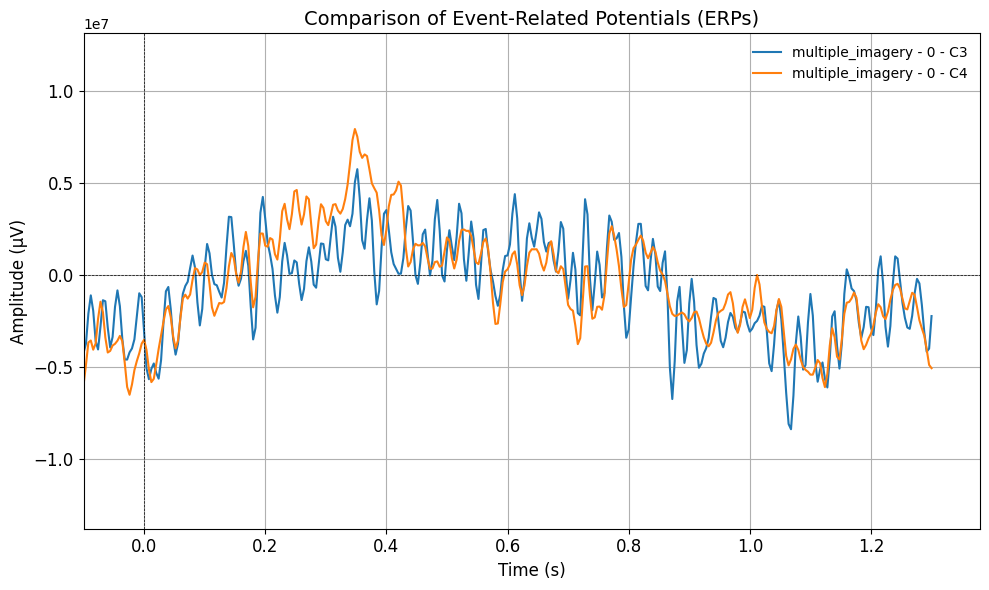

In [41]:
plot_ERP_comparison(
    epochs_dict=notchepochs,  # Your epochs dictionary
    keys=['multiple_imagery'],  # The specific keys you're interested in
    channel_names=['C3','C4'],  # The channels you want to plot
    event_ids=["0"]  # The event IDs you want to plot
)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


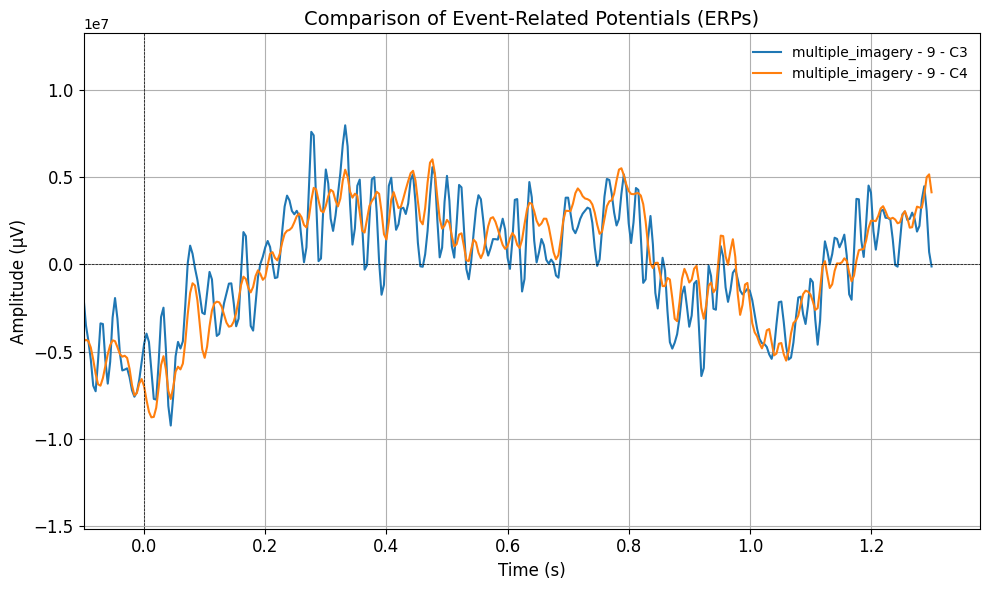

In [42]:
plot_ERP_comparison(
    epochs_dict=notchepochs,  # Your epochs dictionary
    keys=['multiple_imagery'],  # The specific keys you're interested in
    channel_names=['C3','C4'],  # The channels you want to plot
    event_ids=["9"]  # The event IDs you want to plot
)

In [43]:
epochs.ch_names

['C3', 'C4', 'Pz', 'Fp1', 'P3', 'P4', 'A2', 'Cz']

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


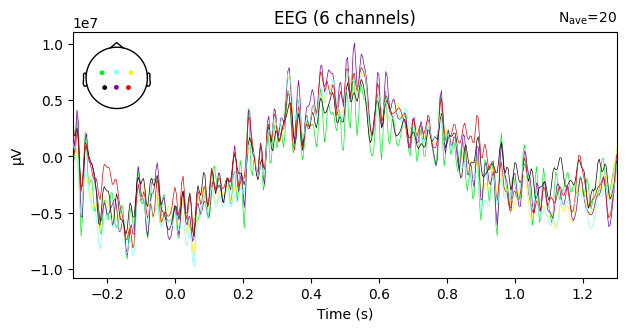

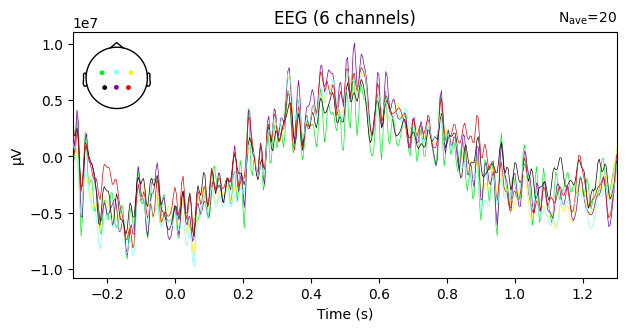

In [44]:
%matplotlib inline 

epochs = notchepochs['multiple_imagery']
epochs.set_channel_types({'Fp1': 'eog'})
epochs["1"].average(picks=['eeg']).plot()
# epochs["0"].average(picks=['Pz']).plot(ylim=[-4, 4])
# epochs["2"].average(picks=['Cz','Pz']).plot()


# epochs["7"].average(picks=['C3','C4']).plot()

# epochs["8"].average(picks=['C3','C4']).plot()
# epochs["9"].average(picks=['C3','C4']).plot()
# epochs["1"].average(picks='eeg').plot(ylim=[-4, 4])

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


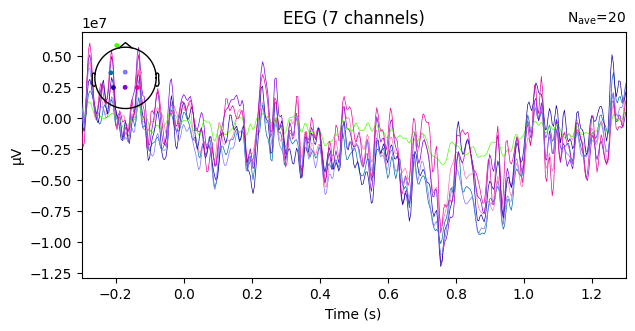

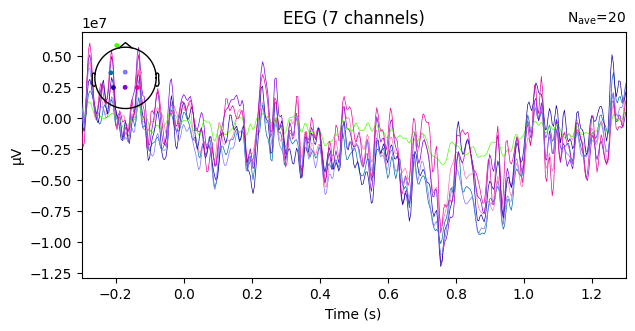

In [45]:
%matplotlib inline 
epochs = notchepochs['single4thtry']

#epochs["4"].average(picks=['C3','C4']).plot()

epochs["7"].average(picks='eeg').plot()



NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


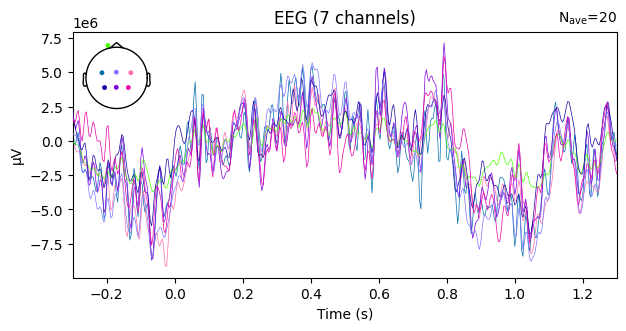

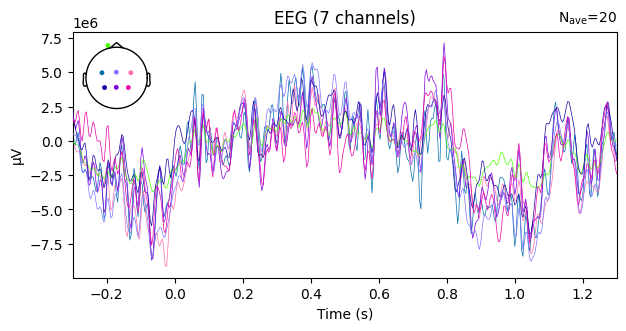

In [46]:
%matplotlib inline 
epochs = notchepochs['multiple_sao']

#epochs["4"].average(picks=['C3','C4']).plot()

epochs["4"].average(picks='eeg').plot()

In [47]:
import mne
from mne.time_frequency import tfr_morlet
import numpy as np

def plot_hand_motor_imagery(epochs, left_epoch_ids, right_epoch_ids, channel, freqs, n_cycles, baseline=(0, 0)):
    """
    Perform time-frequency analysis on motor imagery epochs and plot the results.

    Parameters:
    - epochs: The loaded epochs data.
    - left_epoch_ids: Range or list of epoch IDs for left-hand motor imagery.
    - right_epoch_ids: Range or list of epoch IDs for right-hand motor imagery.
    - channel: The name of the channel to analyze (e.g., 'C3').
    - freqs: Frequencies of interest for the Morlet wavelets.
    - n_cycles: Number of cycles for the Morlet wavelets.
    - baseline: Tuple indicating the time interval to apply baseline. Default is (0, 0).

    This function plots the time-frequency representation for the specified conditions.
    """

    # Extract the relevant epochs for left-hand and right-hand motor imagery
    left_hand_epochs = mne.concatenate_epochs([epochs[str(i)] for i in left_epoch_ids])
    right_hand_epochs = mne.concatenate_epochs([epochs[str(i)] for i in right_epoch_ids])

    # Select the data just for the specified channel
    left_hand_epochs_ch = left_hand_epochs.copy().pick_channels([channel])
    right_hand_epochs_ch = right_hand_epochs.copy().pick_channels([channel])

    # Compute the time-frequency representation using Morlet wavelets for both hands
    power_left = tfr_morlet(left_hand_epochs_ch, freqs=freqs, n_cycles=n_cycles, return_itc=False)
    power_right = tfr_morlet(right_hand_epochs_ch, freqs=freqs, n_cycles=n_cycles, return_itc=False)

    # Plot the results (average across all epochs for the given condition)
    power_left.plot(baseline=baseline, mode='logratio', title=f'Time-Frequency (left-hand motor imagery, {channel})')
    power_right.plot(baseline=baseline, mode='logratio', title=f'Time-Frequency (right-hand motor imagery, {channel})')


In [48]:
import mne
from mne.time_frequency import tfr_morlet
import numpy as np

def plot_hand_motor_imagery(epochs, left_epoch_ids, right_epoch_ids, channel, freqs, n_cycles, baseline=(0, 0)):
    """
    [Previous documentation...]
    """

    # Extract the relevant epochs for left-hand and right-hand motor imagery
    left_hand_epochs = mne.concatenate_epochs([epochs[str(i)] for i in left_epoch_ids])
    right_hand_epochs = mne.concatenate_epochs([epochs[str(i)] for i in right_epoch_ids])

    # Select the data just for the specified channel
    left_hand_epochs_ch = left_hand_epochs.copy().pick_channels([channel])
    right_hand_epochs_ch = right_hand_epochs.copy().pick_channels([channel])

    # Compute the time-frequency representation using Morlet wavelets for both hands
    power_left = tfr_morlet(left_hand_epochs_ch, freqs=freqs, n_cycles=n_cycles, return_itc=False)
    power_right = tfr_morlet(right_hand_epochs_ch, freqs=freqs, n_cycles=n_cycles, return_itc=False)

    # Apply baseline correction (if not None) and get data
    if baseline is not None:
        power_left.apply_baseline(baseline, mode='logratio')
        power_right.apply_baseline(baseline, mode='logratio')

    # Find global min and max for the color scale, considering both power data
    all_data = np.concatenate([power_left.data, power_right.data], axis=0)
    vmin, vmax = all_data.min(), all_data.max()

    # Plot the results (average across all epochs for the given condition) with the same color scale
    power_left.plot(baseline=None, mode='logratio', title=f'Time-Frequency (left-hand motor imagery, {channel})', cmap='RdBu_r', vmin=vmin, vmax=vmax)
    power_right.plot(baseline=None, mode='logratio', title=f'Time-Frequency (right-hand motor imagery, {channel})', cmap='RdBu_r', vmin=vmin, vmax=vmax)


In [49]:

import matplotlib.patches as patches

def plot_hand_motor_imagery(epochs, left_epoch_ids, right_epoch_ids, channel, freqs, n_cycles, baseline=(0, 0), area_of_interest=None):
    """
    [Previous documentation...]

    Parameters:
    - area_of_interest: Optional; a dictionary specifying the time and frequency bounds of the area of interest.
                        It should have the format: 
                        {'tmin': value, 'tmax': value, 'fmin': value, 'fmax': value}
    """

      # Extract the relevant epochs for left-hand and right-hand motor imagery
    left_hand_epochs = mne.concatenate_epochs([epochs[str(i)] for i in left_epoch_ids])
    right_hand_epochs = mne.concatenate_epochs([epochs[str(i)] for i in right_epoch_ids])

    # Select the data just for the specified channel
    left_hand_epochs_ch = left_hand_epochs.copy().pick_channels([channel])
    right_hand_epochs_ch = right_hand_epochs.copy().pick_channels([channel])

    # Compute the time-frequency representation using Morlet wavelets for both hands
    power_left = tfr_morlet(left_hand_epochs_ch, freqs=freqs, n_cycles=n_cycles, return_itc=False)
    power_right = tfr_morlet(right_hand_epochs_ch, freqs=freqs, n_cycles=n_cycles, return_itc=False)

    # Apply baseline correction (if not None) and get data
    if baseline is not None:
        power_left.apply_baseline(baseline, mode='logratio')
        power_right.apply_baseline(baseline, mode='logratio')

    # Find global min and max for the color scale, considering both power data
    all_data = np.concatenate([power_left.data, power_right.data], axis=0)
    vmin, vmax = all_data.min(), all_data.max()


    # Plot the results (average across all epochs for the given condition) with the same color scale
    fig_left = power_left.plot(baseline=None, mode='logratio', title=f'Time-Frequency (left-hand motor imagery, {channel})', cmap='RdBu_r', vmin=vmin, vmax=vmax, show=False)
    fig_right = power_right.plot(baseline=None, mode='logratio', title=f'Time-Frequency (right-hand motor imagery, {channel})', cmap='RdBu_r', vmin=vmin, vmax=vmax, show=False)

    # If an area of interest is defined, draw a rectangle around it
    if area_of_interest is not None:
        # Ensure all necessary data is present in area_of_interest
        if all(key in area_of_interest for key in ('tmin', 'tmax', 'fmin', 'fmax')):
            # Create a rectangle
            rect_params = {
                'xy': (area_of_interest['tmin'], area_of_interest['fmin']),  # bottom left corner of rectangle
                'width': area_of_interest['tmax'] - area_of_interest['tmin'],
                'height': area_of_interest['fmax'] - area_of_interest['fmin'],
                'linewidth': 2,
                'edgecolor': 'r',
                'facecolor': 'none'
            }

            # Add rectangle to the plots
            for fig in [fig_left, fig_right]:
                ax = fig.get_axes()[0]  # Get the main axes from the figure
                rect = patches.Rectangle(**rect_params)
                ax.add_patch(rect)

    # Show the plots
    plt.show(fig_left)
    plt.show(fig_right)


In [73]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import mne
from mne.time_frequency import tfr_morlet

def plot_finger_motor_imagery(epochs_list, epoch_ids_list, channel, freqs, n_cycles, titles, baseline=(0, 0), area_of_interest=None):
    """
    Plots the motor imagery for multiple fingers.

    Parameters:
    - epochs_list: List of Epochs objects for each finger.
    - epoch_ids_list: List of lists, where each sublist contains the epoch IDs for a specific finger.
    - channel: The name of the channel to use.
    - freqs: Frequencies to use in the Morlet wavelet calculation.
    - n_cycles: Number of cycles to use in the Morlet wavelet calculation.
    - titles: List of titles for the plots, typically the finger names.
    - baseline: Tuple representing the baseline period.
    - area_of_interest: Optional; a dictionary specifying the area of interest.
    """

    for epochs, epoch_ids, title in zip(epochs_list, epoch_ids_list, titles):
        # Concatenate epochs for the current finger
        finger_epochs = mne.concatenate_epochs([epochs[str(i)] for i in epoch_ids])

        # Select the data just for the specified channel
        finger_epochs_ch = finger_epochs.copy().pick_channels([channel])

        # Compute the time-frequency representation using Morlet wavelets
        power = tfr_morlet(finger_epochs_ch, freqs=freqs, n_cycles=n_cycles, return_itc=False, average=True)

        # Apply baseline correction (if not None)
        if baseline is not None:
            power.apply_baseline(baseline, mode='logratio')

        # Plot the results
        fig = power.plot(baseline=None, mode='logratio', title=f'Time-Frequency ({title}, {channel})', cmap='RdBu_r', show=False)

        # If an area of interest is defined, draw a rectangle around it
        if area_of_interest is not None and all(key in area_of_interest for key in ('tmin', 'tmax', 'fmin', 'fmax')):
            # Create a rectangle
            rect_params = {
                'xy': (area_of_interest['tmin'], area_of_interest['fmin']),
                'width': area_of_interest['tmax'] - area_of_interest['tmin'],
                'height': area_of_interest['fmax'] - area_of_interest['fmin'],
                'linewidth': 2,
                'edgecolor': 'r',
                'facecolor': 'none'
            }

            # Add rectangle to the plot
            ax = fig.get_axes()[0]  # Get the main axes from the figure
            rect = patches.Rectangle(**rect_params)
            ax.add_patch(rect)

        # Show the plot
        plt.show()

# Usage:
# - Prepare your 'epochs_list' with the Epochs objects for each finger.
# - Define 'epoch_ids_list' with the corresponding epoch IDs for each finger.
# - Specify the 'titles' for each plot, representing each finger.
# - Call 'plot_finger_motor_imagery' with the appropriate parameters.


In [124]:
notchepochs['multiple_imagery']["0"].get_data().shape

(20, 8, 401)

In [ ]:
import mne
from mne.time_frequency import tfr_morlet
import numpy as np

def compare_channels_across_conditions(epochs_imagery, epochs_eyes, freqs, n_cycles, band_of_interest=None, time_of_interest=None, channel=None):
    """
    Compare the power spectral density across channels between two conditions.

    Parameters:
    epochs_imagery (mne.Epochs): Epochs for the 'imagery' condition.
    epochs_eyes (mne.Epochs): Epochs for the 'eyes' condition.
    freqs (array): Frequencies for Morlet wavelets.
    n_cycles (array): Number of cycles for Morlet wavelets.
    band_of_interest (tuple): Frequency band to analyze (e.g., (8, 16) for 8-16 Hz). None uses all frequencies.
    time_of_interest (tuple): Time range to analyze (e.g., (0.1, 0.5) for 100ms to 500ms). None uses all time points.

    Returns:
    dict: A dictionary containing the difference in power for each channel.
    """

    # Get the list of all channels

    # Initialize a structure to store the results
    results = {}

    # Iterate through all channels

    for i in range(0,10):
        imagery_epochs_ch = epochs_imagery[i].copy().pick_channels([channel])
        eyes_epochs_ch = epochs_eyes[i].copy().pick_channels([channel])
     
        # Compute the time-frequency representation using Morlet wavelets
        power_imagery = tfr_morlet(imagery_epochs_ch, freqs=freqs, n_cycles=n_cycles, return_itc=False, average=True)
        power_eyes = tfr_morlet(eyes_epochs_ch, freqs=freqs, n_cycles=n_cycles, return_itc=False, average=True)

        # If a specific band is defined, select only those frequencies
        if band_of_interest:
            power_imagery = power_imagery.crop(fmin=band_of_interest[0], fmax=band_of_interest[1])
            power_eyes = power_eyes.crop(fmin=band_of_interest[0], fmax=band_of_interest[1])

        # If a specific time range is defined, select only those times
        if time_of_interest:
            power_imagery = power_imagery.crop(tmin=time_of_interest[0], tmax=time_of_interest[1])
            power_eyes = power_eyes.crop(tmin=time_of_interest[0], tmax=time_of_interest[1])

        # Calculate the difference in power between the conditions
        power_diff = power_imagery.data - power_eyes.data
    
        results[i]=power_diff

    return results

# Usage:
# Define the frequencies of interest and the number of cycles for the Morlet wavelets
freqs = np.arange(6, 30, 3)  # e.g., 6 to 30 Hz in steps of 3 Hz
n_cycles = freqs / 2.  # e.g., half a cycle per frequency

# Load your epochs data (if not already loaded)
# epochs_imagery and epochs_eyes are your loaded epochs data for each condition

# Call the function with the necessary parameters
results = compare_channels_across_conditions(notchepochs['multiple_imagery'], notchepochs['multiple_eye'], freqs, n_cycles, band_of_interest=(8, 16),time_of_interest=(0.6,0.8),channel="C3")

# Further analysis can be conducted on 'results' as needed.


In [ ]:
#i want to select channel base on feature importance
difdict = {}
for chan in notchepochs['multiple_imagery'].ch_names:
    if chan!="A2" and chan!="Fp1":
        print(chan)
        results = compare_channels_across_conditions(notchepochs['multiple_sao'], notchepochs['multiple_eye'], freqs, n_cycles, band_of_interest=(8, 16),time_of_interest=(0.6,0.8),channel=chan)
        sum=0
        for i in range(0,10):
            sum+=np.abs(results[i].flatten().sum())
        print(sum)
        difdict[chan]=sum

In [173]:
difdict

{'C3': 190936.6608836123,
 'C4': 209316.47360391356,
 'Pz': 469819.16490870796,
 'P3': 294238.07325946336,
 'P4': 369224.2682974416,
 'Cz': 210074.7241553491}

Not setting metadata
20 matching events found
No baseline correction applied
Not setting metadata
20 matching events found
No baseline correction applied
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
No baseline correction applied
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
No baseline correction applied


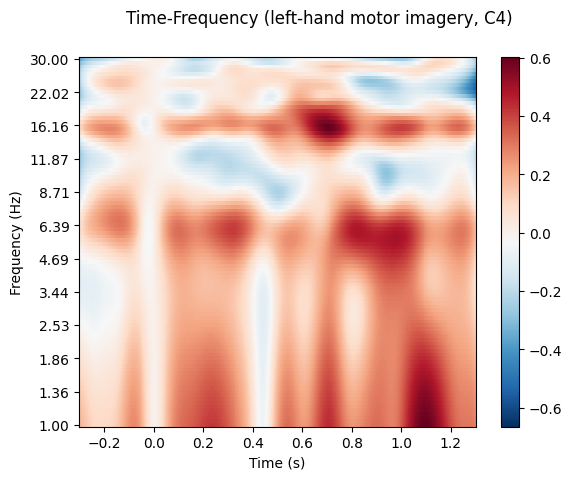

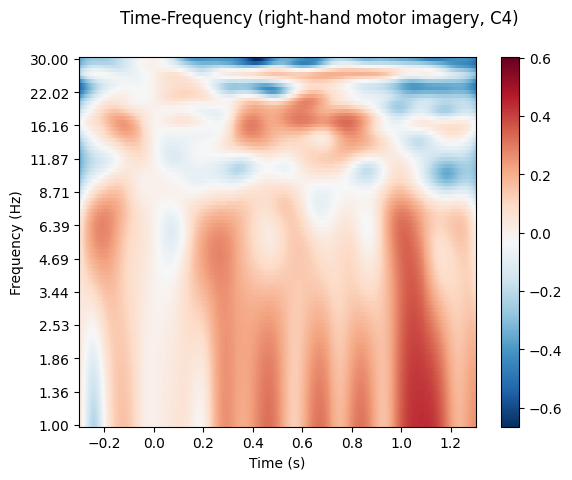

Not setting metadata
100 matching events found
No baseline correction applied
Not setting metadata
100 matching events found
No baseline correction applied
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
No baseline correction applied
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
No baseline correction applied


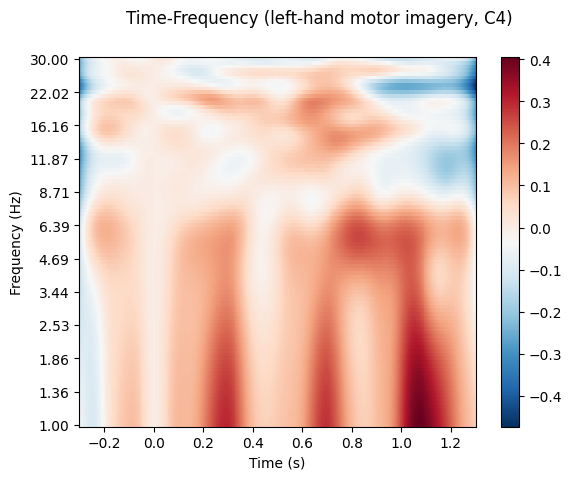

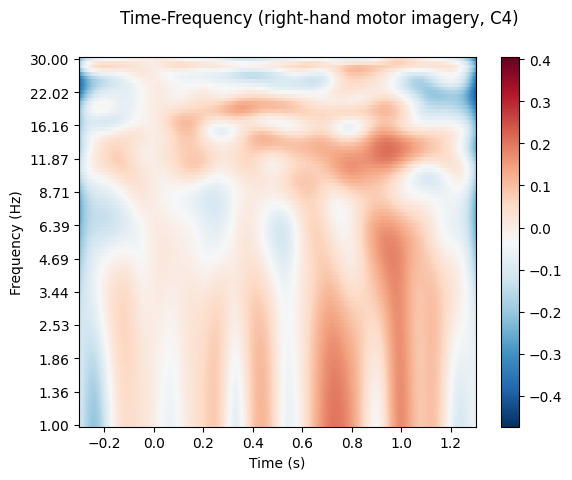

In [549]:
plot_hand_motor_imagery( 
    epochs=notchepochs['single4thtry'],  # your epochs data
    left_epoch_ids=range(1),  # or list of specific epoch numbers for left hand
    right_epoch_ids=[2],  # or list of specific epoch numbers for right hand
    channel='C4',
    area_of_interest=[0.6,0.8,8,13],
    freqs=np.logspace(*np.log10([1, 30]), num=100),  # frequencies of interest
    n_cycles=np.logspace(*np.log10([1, 30]), num=100) / 2.  # number of cycles for each frequency
)
plot_hand_motor_imagery(
    epochs=notchepochs['single4thtry'],  # your epochs data
    left_epoch_ids=range(0,5),  # or list of specific epoch numbers for left hand
    right_epoch_ids=range(5,10),  # or list of specific epoch numbers for right hand
    channel='C4',
    area_of_interest=[0.6,0.8,8,13],
    freqs=np.logspace(*np.log10([1, 30]), num=100),  # frequencies of interest
    n_cycles=np.logspace(*np.log10([1, 30]), num=100) / 2.  # number of cycles for each frequency
)

In [88]:
def plot_individual_motor_imagery(epochs, epoch_ranges, channel, freqs, n_cycles):
    # First, compute all power data and find global min and max
    all_power_data = []
    for epoch_range in epoch_ranges:
        specific_epochs = mne.concatenate_epochs([epochs[str(j)] for j in range(*epoch_range)])
        specific_epochs_ch = specific_epochs.copy().pick_channels([channel])
        power = tfr_morlet(specific_epochs_ch, freqs=freqs, n_cycles=n_cycles, return_itc=False, average=True)
        all_power_data.append(power.data)

    # Find global min and max for the color scale, considering all power data
    all_data = np.concatenate(all_power_data, axis=0)
    vmin, vmax = all_data.min(), all_data.max()

    # Now, plot each using the same color scale
    for i, epoch_range in enumerate(epoch_ranges, 1):  # 'i' will be the graph number
        specific_epochs = mne.concatenate_epochs([epochs[str(j)] for j in range(*epoch_range)])
        specific_epochs_ch = specific_epochs.copy().pick_channels([channel])
        power = tfr_morlet(specific_epochs_ch, freqs=freqs, n_cycles=n_cycles, return_itc=False, average=True)

        # Plot the results with the same color scale
        fig = power.plot(baseline=None, mode='logratio', title=f'Graph {i}: Time-Frequency ({channel})', cmap='RdBu_r', vmin=vmin, vmax=vmax, show=False)
        
        # Customize the plot, e.g., by adding the graph number
        ax = fig.get_axes()[0]  # Get the main axes from the figure
        ax.text(0.02, 0.95, f'Graph {i}', transform=ax.transAxes, fontsize=12, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

        # Show the plot
        plt.show(fig)


In [96]:
notchepochs['multiple_imagery'].event_id

{'0': 0,
 '1': 1,
 '2': 2,
 '3': 3,
 '4': 4,
 '5': 5,
 '6': 6,
 '7': 7,
 '8': 8,
 '9': 9,
 '100': 100,
 '400': 400}

Not setting metadata
20 matching events found
No baseline correction applied
Not setting metadata
180 matching events found
No baseline correction applied
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/var/folders/36/kdqqc2hj0vj0qz_r5mtckf700000gn/T/ipykernel_27651/3121397162.py:14: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  left_hand_epochs = mne.concatenate_epochs([epochs[str(i)] for i in left_epoch_ids])
/var/folders/36/kdqqc2hj0vj0qz_r5mtckf700000gn/T/ipykernel_27651/3121397162.py:15: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  right_hand_epochs = mne.concatenate_epochs([epochs[str(i)] for i in right_epoch_ids])


Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
No baseline correction applied
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
No baseline correction applied


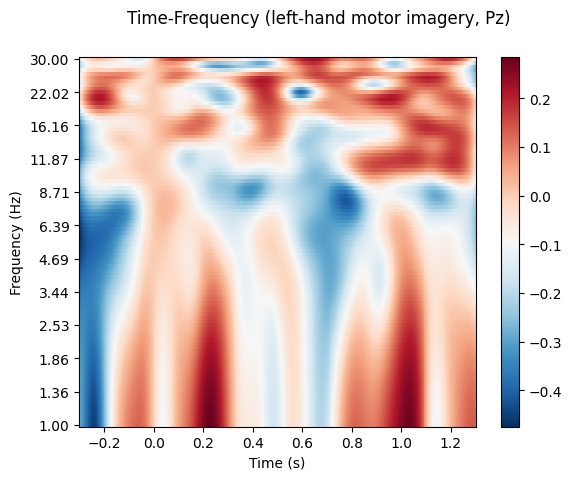

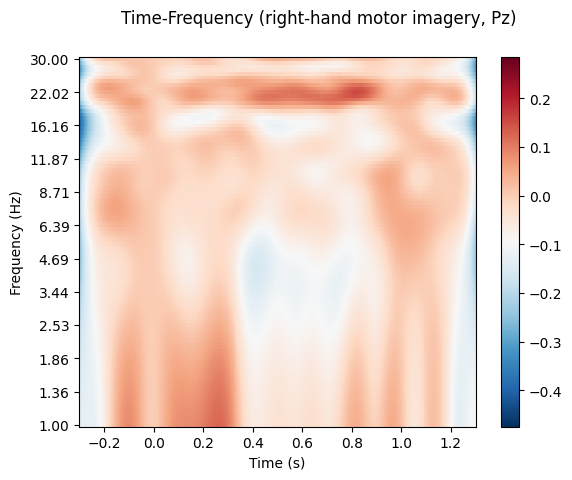

Not setting metadata
20 matching events found
No baseline correction applied
Not setting metadata
180 matching events found
No baseline correction applied
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
No baseline correction applied
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
No baseline correction applied


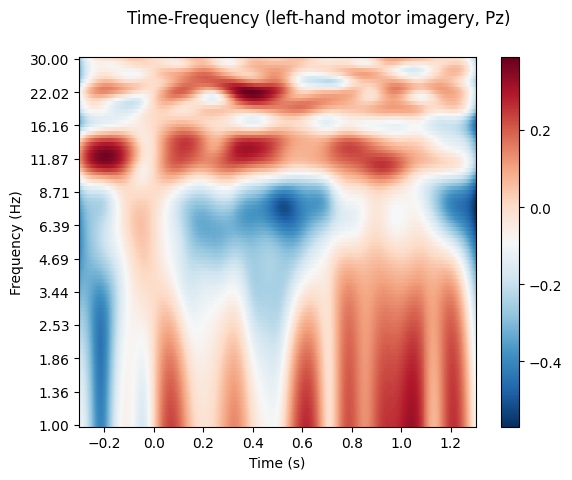

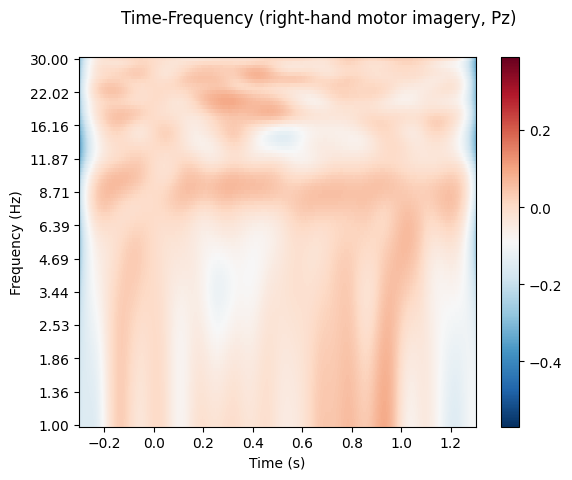

In [107]:
plot_hand_motor_imagery(
    epochs=notchepochs['multiple_imagery'],  # your epochs data
    left_epoch_ids=[100],  # or list of specific epoch numbers for left hand
    right_epoch_ids=range(0,9),  # or list of specific epoch numbers for right hand
    channel='Pz',
    area_of_interest=[0.6,0.8,8,13],
    freqs=np.logspace(*np.log10([1, 30]), num=100),  # frequencies of interest
    n_cycles=np.logspace(*np.log10([1, 30]), num=100) / 2.  # number of cycles for each frequency
)
plot_hand_motor_imagery(
    epochs=notchepochs['multiple_eye'],  # your epochs data
    left_epoch_ids=[100],  # or list of specific epoch numbers for left hand
    right_epoch_ids=range(0,9),  # or list of specific epoch numbers for right hand
    channel='Pz',
    area_of_interest=[0.6,0.8,8,13],
    freqs=np.logspace(*np.log10([1, 30]), num=100),  # frequencies of interest
    n_cycles=np.logspace(*np.log10([1, 30]), num=100) / 2.  # number of cycles for each frequency
)

Not setting metadata
20 matching events found
No baseline correction applied
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


Not setting metadata
20 matching events found
No baseline correction applied
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/var/folders/36/kdqqc2hj0vj0qz_r5mtckf700000gn/T/ipykernel_27651/3672583473.py:5: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  specific_epochs = mne.concatenate_epochs([epochs[str(j)] for j in range(*epoch_range)])
/var/folders/36/kdqqc2hj0vj0qz_r5mtckf700000gn/T/ipykernel_27651/3672583473.py:5: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  specific_epochs = mne.concatenate_epochs([epochs[str(j)] for j in range(*epoch_range)])


Not setting metadata
20 matching events found
No baseline correction applied
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Not setting metadata
20 matching events found
No baseline correction applied
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/var/folders/36/kdqqc2hj0vj0qz_r5mtckf700000gn/T/ipykernel_27651/3672583473.py:5: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  specific_epochs = mne.concatenate_epochs([epochs[str(j)] for j in range(*epoch_range)])
/var/folders/36/kdqqc2hj0vj0qz_r5mtckf700000gn/T/ipykernel_27651/3672583473.py:5: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  specific_epochs = mne.concatenate_epochs([epochs[str(j)] for j in range(*epoch_range)])


Not setting metadata
20 matching events found
No baseline correction applied
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Not setting metadata
20 matching events found
No baseline correction applied
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/var/folders/36/kdqqc2hj0vj0qz_r5mtckf700000gn/T/ipykernel_27651/3672583473.py:5: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  specific_epochs = mne.concatenate_epochs([epochs[str(j)] for j in range(*epoch_range)])
/var/folders/36/kdqqc2hj0vj0qz_r5mtckf700000gn/T/ipykernel_27651/3672583473.py:5: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  specific_epochs = mne.concatenate_epochs([epochs[str(j)] for j in range(*epoch_range)])


Not setting metadata
20 matching events found
No baseline correction applied
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Not setting metadata
20 matching events found
No baseline correction applied
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/var/folders/36/kdqqc2hj0vj0qz_r5mtckf700000gn/T/ipykernel_27651/3672583473.py:5: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  specific_epochs = mne.concatenate_epochs([epochs[str(j)] for j in range(*epoch_range)])
/var/folders/36/kdqqc2hj0vj0qz_r5mtckf700000gn/T/ipykernel_27651/3672583473.py:5: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  specific_epochs = mne.concatenate_epochs([epochs[str(j)] for j in range(*epoch_range)])


Not setting metadata
20 matching events found
No baseline correction applied
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Not setting metadata
20 matching events found
No baseline correction applied
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/var/folders/36/kdqqc2hj0vj0qz_r5mtckf700000gn/T/ipykernel_27651/3672583473.py:5: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  specific_epochs = mne.concatenate_epochs([epochs[str(j)] for j in range(*epoch_range)])
/var/folders/36/kdqqc2hj0vj0qz_r5mtckf700000gn/T/ipykernel_27651/3672583473.py:5: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  specific_epochs = mne.concatenate_epochs([epochs[str(j)] for j in range(*epoch_range)])


Not setting metadata
20 matching events found
No baseline correction applied
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
No baseline correction applied


/var/folders/36/kdqqc2hj0vj0qz_r5mtckf700000gn/T/ipykernel_27651/3672583473.py:16: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  specific_epochs = mne.concatenate_epochs([epochs[str(j)] for j in range(*epoch_range)])


AttributeError: 'list' object has no attribute 'get_axes'

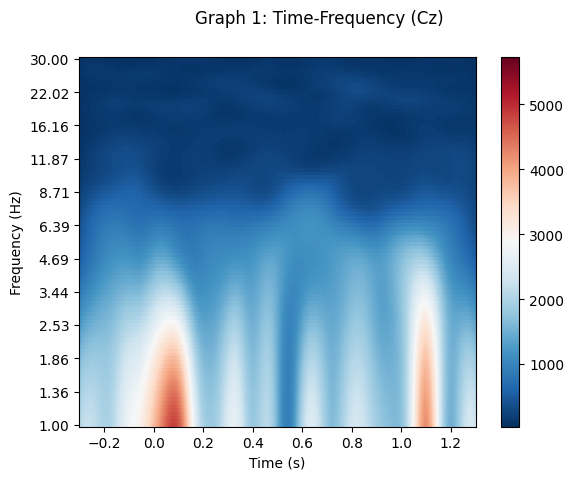

In [93]:

# Usage of the function with your data and specifications
plot_individual_motor_imagery(
    epochs=notchepochs['multiple_imagery'],  # your epochs data
    epoch_ranges= [(i, i+1) for i in range(10)],
    channel='Cz',
    freqs=np.logspace(*np.log10([1, 30]), num=100),  # frequencies of interest
    n_cycles=np.logspace(*np.log10([1, 30]), num=100) / 2,  # number of cycles for each frequency
)


Not setting metadata
20 matching events found
No baseline correction applied
Not setting metadata
20 matching events found
No baseline correction applied
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/var/folders/36/kdqqc2hj0vj0qz_r5mtckf700000gn/T/ipykernel_27651/3121397162.py:14: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  left_hand_epochs = mne.concatenate_epochs([epochs[str(i)] for i in left_epoch_ids])
/var/folders/36/kdqqc2hj0vj0qz_r5mtckf700000gn/T/ipykernel_27651/3121397162.py:15: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  right_hand_epochs = mne.concatenate_epochs([epochs[str(i)] for i in right_epoch_ids])


Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
No baseline correction applied
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
No baseline correction applied


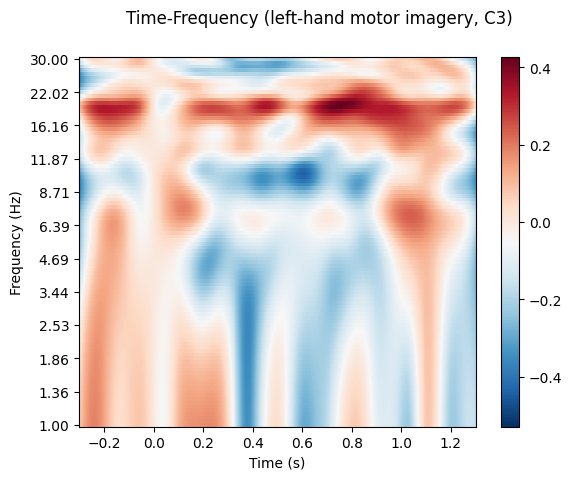

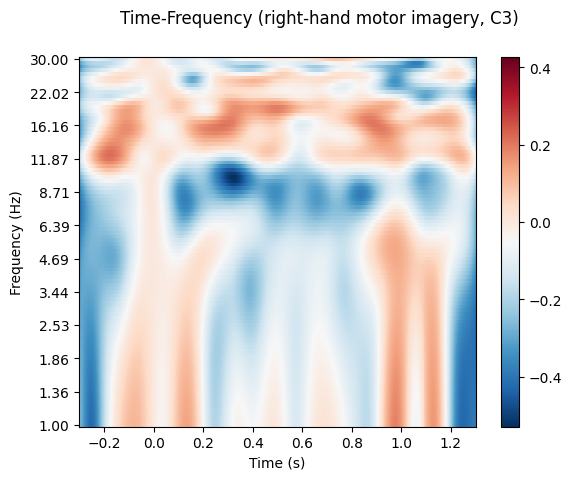

Not setting metadata
20 matching events found
No baseline correction applied
Not setting metadata
20 matching events found
No baseline correction applied
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/var/folders/36/kdqqc2hj0vj0qz_r5mtckf700000gn/T/ipykernel_27651/3121397162.py:14: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  left_hand_epochs = mne.concatenate_epochs([epochs[str(i)] for i in left_epoch_ids])
/var/folders/36/kdqqc2hj0vj0qz_r5mtckf700000gn/T/ipykernel_27651/3121397162.py:15: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  right_hand_epochs = mne.concatenate_epochs([epochs[str(i)] for i in right_epoch_ids])


Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
No baseline correction applied
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
No baseline correction applied


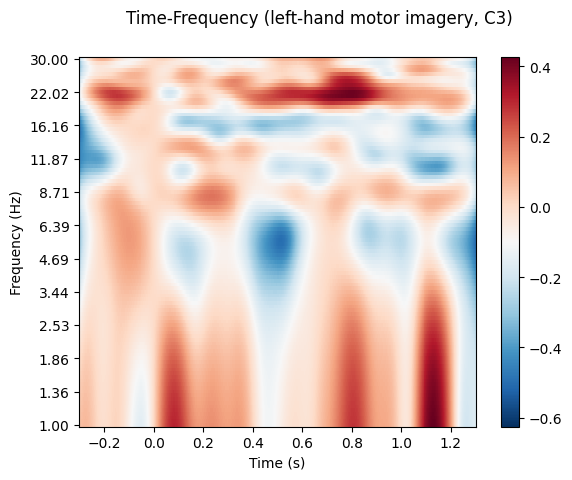

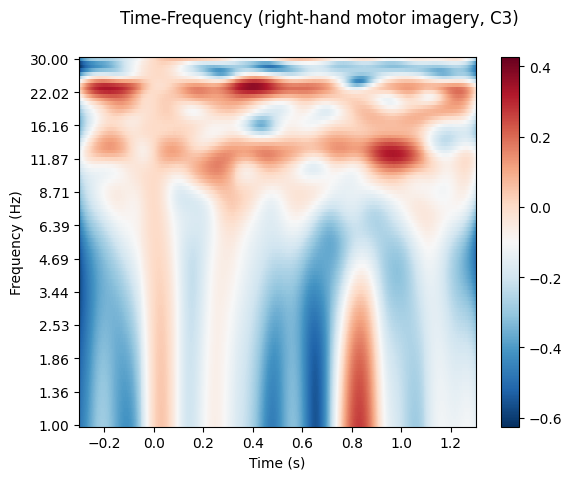

In [59]:
plot_hand_motor_imagery(
    epochs=notchepochs['multiple_imagery'],  # your epochs data
    left_epoch_ids=[1],  # or list of specific epoch numbers for left hand
    right_epoch_ids=[2],  # or list of specific epoch numbers for right hand
    channel='C3',
    area_of_interest=[0.6,0.8,8,13],
    freqs=np.logspace(*np.log10([1, 30]), num=100),  # frequencies of interest
    n_cycles=np.logspace(*np.log10([1, 30]), num=100) / 2.  # number of cycles for each frequency
)
plot_hand_motor_imagery(
    epochs=notchepochs['multiple_imagery'],  # your epochs data
    left_epoch_ids=[3],  # or list of specific epoch numbers for left hand
    right_epoch_ids=[4],  # or list of specific epoch numbers for right hand
    channel='C3',
    area_of_interest=[0.6,0.8,8,13],
    freqs=np.logspace(*np.log10([1, 30]), num=100),  # frequencies of interest
    n_cycles=np.logspace(*np.log10([1, 30]), num=100) / 2.  # number of cycles for each frequency
)

In [95]:
notchepochs['multiple_imagery'].get_data().shape    

(260, 8, 401)

In [53]:
plot_hand_motor_imagery(
    epochs=fp1epochs['multiple_imagery'],  # your epochs data
    left_epoch_ids=range(5),  # or list of specific epoch numbers for left hand
    right_epoch_ids=range(5, 10),  # or list of specific epoch numbers for right hand
    channel='Pz',
    freqs=np.logspace(*np.log10([6, 30]), num=100),  # frequencies of interest
    n_cycles=np.logspace(*np.log10([6, 30]), num=100) / 2.  # number of cycles for each frequency
)

NameError: name 'fp1epochs' is not defined

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


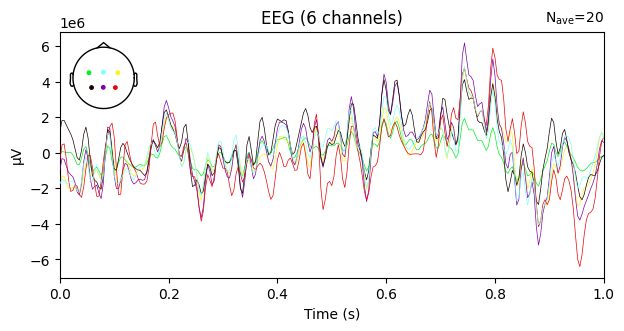

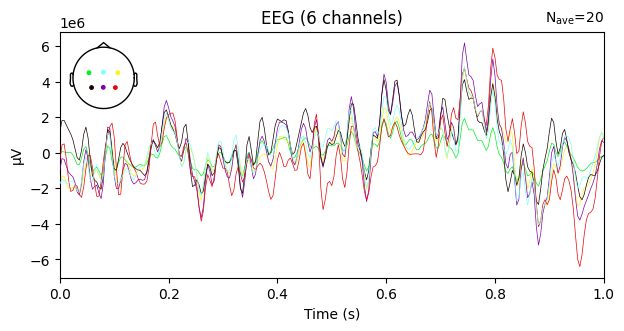

In [ ]:
%matplotlib inline 
epochs = notchepochs['multiple_sao']

# epochs["4"].average(picks=['C3','C4']).plot(ylim=[-4,4])
# epochs["3"].average(picks=['C3','C4']).plot(ylim=[-4,4])

# epochs["2"].average(picks=['C3','C4']).plot(ylim=[-4,4])

# epochs["8"].average(picks=['C3','C4']).plot(ylim=[-4,4])
# epochs["7"].average(picks=['C3','C4']).plot(ylim=[-4, 4])



epochs["4"].average(picks='eeg').plot(ylim=[-4, 4])


In [ ]:
import mne.preprocessing as mnepp
eogs=mnepp.find_eog_events(raw)

Using EOG channel: FP1
EOG channel index for this subject is: [3]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Selecting channel FP1 for blink detection
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2500 samples (10.000 s)

Now detecting blinks and generating corresponding events
Found 177 significant peaks
Number of EOG events detected: 177


In [ ]:
eegfiles

['data_oct9/data_multiple_imagery.csv',
 'data_oct9/data_multiple_sao.csv',
 'data_oct9/data_saotimevaries.csv',
 'data_oct9/data_multiple_movefingers.csv',
 'data_oct9/data_multiple_eye.csv',
 'data_oct9/data_single4thtry.csv']

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.192 (s)


/Users/gongqianxi/Library/Python/3.9/lib/python/site-packages/mne/viz/utils.py:161: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


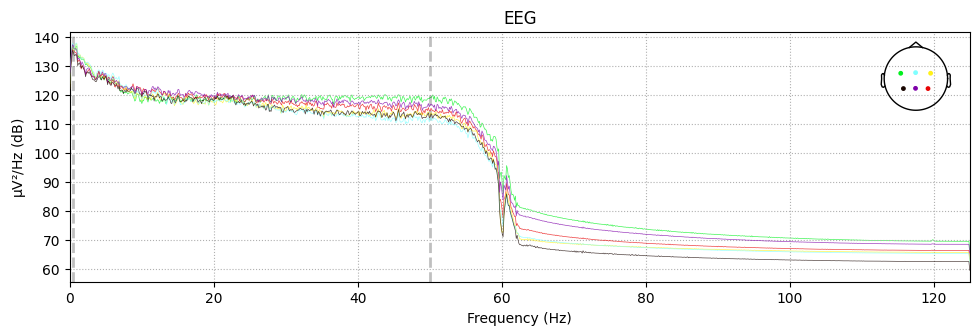

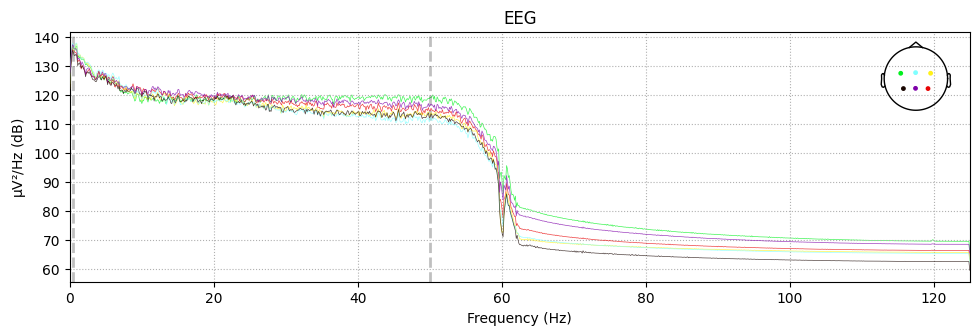

In [ ]:
epochs = rawdict['multiple_sao']
epochs.plot_psd()

In [ ]:
epochdict['multiple_eye'].plot(scaling='auto')

TypeError: plot() got an unexpected keyword argument 'scaling'

In [ ]:
#compare psd with iir filter, fir filter and no filter 